In [250]:
%autosave 0

Autosave disabled


# 4. Evaluation Metrics for Classification

In the previous session we trained a model for predicting churn. How do we know if it's good?


## 4.1 Evaluation metrics: session overview 

* Dataset: https://www.kaggle.com/blastchar/telco-customer-churn
* https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-03-churn-prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv


*Metric* - function that compares the predictions with the actual values and outputs a single number that tells how good the predictions are

In [251]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [252]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [253]:
#import and clean

df = pd.read_csv('/workspaces/machine-learning-dtzc-homework/03-churn/data-week-3.csv')

df.columns = df.columns.str.lower().str.replace(' ', '_')

categorical_columns = list(df.dtypes[df.dtypes == 'object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(' ', '_')

df.totalcharges = pd.to_numeric(df.totalcharges, errors='coerce')
df.totalcharges = df.totalcharges.fillna(0)

df.churn = (df.churn == 'yes').astype(int)

In [254]:
#create sets

df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test = df_test.churn.values

del df_train['churn']
del df_val['churn']
del df_test['churn']

In [255]:
#create subsets by dtype
numerical = ['tenure', 'monthlycharges', 'totalcharges']

categorical = [
    'gender',
    'seniorcitizen',
    'partner',
    'dependents',
    'phoneservice',
    'multiplelines',
    'internetservice',
    'onlinesecurity',
    'onlinebackup',
    'deviceprotection',
    'techsupport',
    'streamingtv',
    'streamingmovies',
    'contract',
    'paperlessbilling',
    'paymentmethod',
]

In [256]:
#retrieve sets and run to dictionaries.
#apply logistic regression with training sets
dv = DictVectorizer(sparse=False)

train_dict = df_train[categorical + numerical].to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

model = LogisticRegression()
model.fit(X_train, y_train)

/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [257]:
#validation set 
#derive churn rate 

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

y_pred = model.predict_proba(X_val)[:, 1]
churn_decision = (y_pred >= 0.5)
(y_val == churn_decision).mean()

#0.5 threshold.  why? is this good. investigate. try 0.3 or 0.6 and see impact.

np.float64(0.8026969481902059)

## 4.2 Accuracy and dummy model

* Evaluate the model on different thresholds
* Check the accuracy of dummy baselines


Accuracy measures the fraction of correct predictions. Specifically, it is the number of correct predictions divided by the total number of predictions.

We can change the decision threshold, it should not be always 0.5. But, in this particular problem, the best decision cutoff, associated with the hightest accuracy (80%), was indeed 0.5.

Note that if we build a dummy model in which the decision cutoff is 1, so the algorithm predicts that no clients will churn, the accuracy would be 73%. Thus, we can see that the improvement of the original model with respect to the dummy model is not as high as we would expect.

Therefore, in this problem accuracy can not tell us how good is the model because the dataset is unbalanced, which means that there are more instances from one category than the other. This is also known as class imbalance.

Classes and methods:

    np.linspace(x,y,z) - returns a numpy array starting at x until y with z evenly spaced samples
    Counter(x) - collection class that counts the number of instances that satisfy the x condition
    accuracy_score(x, y) - sklearn.metrics class for calculating the accuracy of a model, given a predicted x dataset and a target y dataset.


In [258]:
len(y_val)

1409

In [259]:
#look at .sum() as well as .mean()
#accuracy is number of correct / total number of customers
#approx 80% as seen below 
(y_val == churn_decision).mean()

np.float64(0.8026969481902059)

In [260]:
1132/ 1409

0.8034066713981547

In [261]:
from sklearn.metrics import accuracy_score

In [262]:
accuracy_score(y_val, y_pred >= 0.5)
#acutal values and predictions, output score

0.8026969481902059

In [263]:
#try different thresholds using linspace
#using t as threshold variable retrieved from variable .linspace set
thresholds = np.linspace(0, 1, 21)

scores = []

for t in thresholds:
    score = accuracy_score(y_val, y_pred >= t)
    print('%.2f %.3f' % (t, score))
    scores.append(score)

#t, score.
#o.55 is optimal with .803 score. 
#scores at both extreme ends are of interest. bc if scores is above 1.0 they are def churning. 
#in this case, no values over 1.0

0.00 0.274
0.05 0.508
0.10 0.591
0.15 0.666
0.20 0.709
0.25 0.737
0.30 0.760
0.35 0.773
0.40 0.785
0.45 0.792
0.50 0.803
0.55 0.801
0.60 0.795
0.65 0.786
0.70 0.766
0.75 0.744
0.80 0.734
0.85 0.726
0.90 0.726
0.95 0.726
1.00 0.726


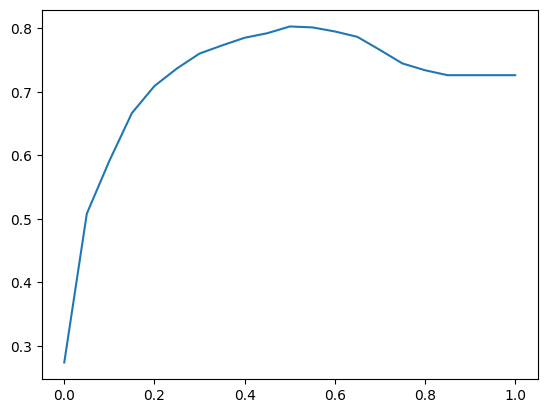

In [264]:
#plot matplotlib
#confirm visually, that 0.5 is best threshold
plt.plot(thresholds, scores)

In [265]:
from collections import Counter
#count things! 

In [266]:
Counter()

Counter()

In [267]:
Counter(y_pred >= 1.0)
#how many False values or non-churning.

Counter({np.False_: 1409})

In [268]:
1 - y_val.mean()
#this dummy model has 73% accuracy (class imbalance), ours has 80% accuracy.
#distribution of y, more nonchurn than churn. 
#incorrect in model where there is churn.

np.float64(0.7260468417317246)

## 4.3 Confusion table

* Different types of errors and correct decisions
* Arranging them in a table


Confusion table is a way of measuring different types of errors and correct decisions that binary classifiers can make. Considering this information, it is possible to evaluate the quality of the model by different strategies.

When comes to a prediction of an LR model, each falls into one of four different categories:

    Prediction is that the customer WILL churn. This is known as the Positive class
        And Customer actually churned - Known as a True Positive (TP)
        But Customer actually did not churn - Known as a False Positive (FP)
    Prediction is that the customer WILL NOT churn' - This is known as the Negative class
        Customer did not churn - True Negative (TN)
        Customer churned - False Negative (FN)


In [269]:
#four square grid of predict +/- vs acutual +/-
#pred is x axis
#acutal is y axis:
# TP | FN
# FP | TN

In [270]:
#splitting val set
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [271]:
#splitting val set with target variable 
t = 0.5
predict_positive = (y_pred >= t)
predict_negative = (y_pred < t)

In [272]:
#get sum of values in table matrix
tp = (predict_positive & actual_positive).sum()
tn = (predict_negative & actual_negative).sum()

fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [273]:
#view array of table matrix
confusion_matrix = np.array([
    [tn, fp],
    [fn, tp]
])
confusion_matrix

array([[921, 102],
       [176, 210]])

In [274]:
#get percentages, rounded for values
(confusion_matrix / confusion_matrix.sum()).round(2)

array([[0.65, 0.07],
       [0.12, 0.15]])

## 4.4 Precision and Recall

MNEMONICS:

    Precision : From the predicted positives, how many we predicted right. See how the word precision is similar to the word prediction?

    Recall : From the real positives, how many we predicted right. See how the word recall is similar to the word real?


In [275]:
#p = precision
p = tp / (tp + fp)
p

np.float64(0.6730769230769231)

In [276]:
#number of people that get promotional email
(tp + fp)

np.int64(312)

In [277]:
#actual number of people who will churn
tp

np.int64(210)

In [278]:
#recall - fraction of users identified correctly
#or real.  real number of actual churn
#note that this has fn not fp !  precision has fp. 
# 54% is actual, so failed to identify  46% of users.
# so our model isn't as good as we thought by looking at accuracy number bc of class imbalance.

r = tp / (tp + fn)
r

np.float64(0.5440414507772021)

In [279]:
(tp + fn)
#actual number who should be promo email and number who will churn


np.int64(386)

## 4.5 ROC Curves

### TPR and FRP

ROC stands for Receiver Operating Characteristic, and this idea was applied during the Second World War for evaluating the strength of radio detectors. This measure considers False Positive Rate (FPR) and True Postive Rate (TPR), which are derived from the values of the confusion matrix.

FPR is the fraction of false positives (FP) divided by the total number of negatives (FP and TN - the first row of confusion matrix), and we want to minimize it. The formula of FPR is the following:

In the other hand, TPR or Recall is the fraction of true positives (TP) divided by the total number of positives (FN and TP - second row of confusion table), and we want to maximize this metric. The formula of this measure is presented below:

ROC curves consider Recall and FPR under all the possible thresholds. If the threshold is 0 or 1, the FPR and Recall scores are the opposite of the threshold (1 and 0 respectively), but they have different meanings, as we explained before.

We need to compare the ROC curves against a point of reference to evaluate its performance, so the corresponding curves of random and ideal models are required. It is possible to plot the ROC curves with FPR and Recall scores vs thresholds, or FPR vs Recall.

Classes and methods:

    np.repeat([x,y], [z,w]) - returns a numpy array with a z number of x values, and a w number of y values.
    roc_curve(x, y) - sklearn.metrics class for calculating the false positive rates, true positive rates, and thresholds, given a target x dataset and a predicted y dataset.


In [280]:
# actual pos = using TP and FN
# acutal neg = using FP and TN
# (values from table matrix above)

In [281]:
# true positive rate = using TP and FN
tpr = tp / (tp + fn)
tpr

np.float64(0.5440414507772021)

In [282]:
# false positive rate = using FP and TN
fpr = fp / (fp + tn)
fpr

np.float64(0.09970674486803519)

In [283]:
#creating confusion matrix (table matrix)
#
scores = []

thresholds = np.linspace(0, 1, 101)

for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    
    predict_positive = (y_pred >= t)
    predict_negative = (y_pred < t)

    tp = (predict_positive & actual_positive).sum()
    tn = (predict_negative & actual_negative).sum()

    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    
    scores.append((t, tp, fp, fn, tn))

In [284]:
#creating DF to contain matrix
# with columns tpr and fpr computed from confusion matrix values
columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
df_scores = pd.DataFrame(scores, columns=columns)

df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

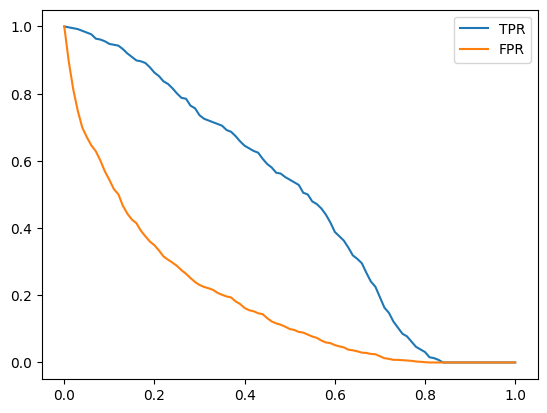

In [285]:
#plot both tpr and fpr 
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR')
plt.legend()

#so what does this mean? 
#want fpr to decrease sa fast as possible 
#want tpr to stay near 1 as long as possible
#so we use a RANDOM MODEL to test

### Random model

In [286]:
#assign random to set
np.random.seed(1)
y_rand = np.random.uniform(0, 1, size=len(y_val))

In [287]:
#accuracy for this model, which is expected
((y_rand >= 0.5) == y_val).mean()

np.float64(0.5017743080198722)

In [288]:
#pass any prediction into df 
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)
    
    return df_scores

In [289]:
df_rand[::10]
#view every tenth record from random set

NameError: name 'df_rand' is not defined

In [50]:
df_rand = tpr_fpr_dataframe(y_val, y_rand)

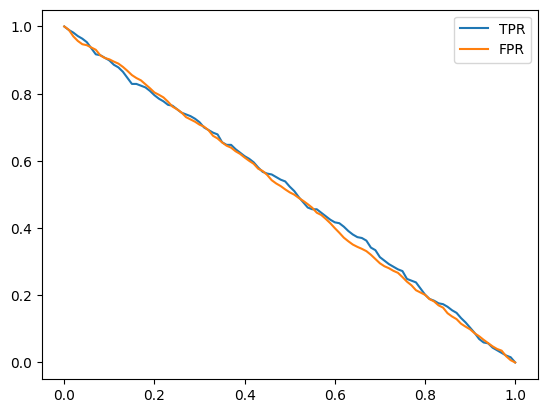

In [51]:
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR')
plt.legend()

### Ideal model

In [52]:
num_neg = (y_val == 0).sum()
num_pos = (y_val == 1).sum()
num_neg, num_pos

(np.int64(1023), np.int64(386))

In [127]:
#validation set in a way
y_ideal = np.repeat([0, 1], [num_neg, num_pos])
y_ideal

#predict using linspace, acutal values
y_ideal_pred = np.linspace(0, 1, len(y_val))

NameError: name 'num_neg' is not defined

In [54]:
#accuracy threshold calculation
1 - y_val.mean()

np.float64(0.7260468417317246)

In [58]:
accuracy_score(y_ideal, y_ideal_pred >= 0.726)
#helps benchmark real model

1.0

In [126]:
#df for 
df_ideal = tpr_fpr_dataframe(y_ideal, y_ideal_pred)
df_ideal[::10]

NameError: name 'y_ideal' is not defined

In [124]:
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR')
plt.legend()

NameError: name 'df_ideal' is not defined

In [ ]:
#tipping point is at 0.726 threshold
#false positive rate is 45% ! 

### Putting everything together

In [ ]:
#plot all the models together

NameError: name 'df_ideal' is not defined

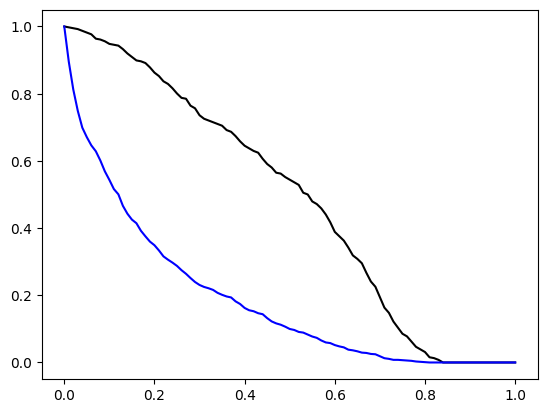

In [209]:
#actual model
plt.plot(df_scores.threshold, df_scores['tpr'], label='TPR', color='black')
plt.plot(df_scores.threshold, df_scores['fpr'], label='FPR', color='blue')

#ideal model
plt.plot(df_ideal.threshold, df_ideal['tpr'], label='TPR ideal')
plt.plot(df_ideal.threshold, df_ideal['fpr'], label='FPR ideal')

#random model
plt.plot(df_rand.threshold, df_rand['tpr'], label='TPR random', color='grey')
plt.plot(df_rand.threshold, df_rand['fpr'], label='FPR random', color='grey')

plt.legend()

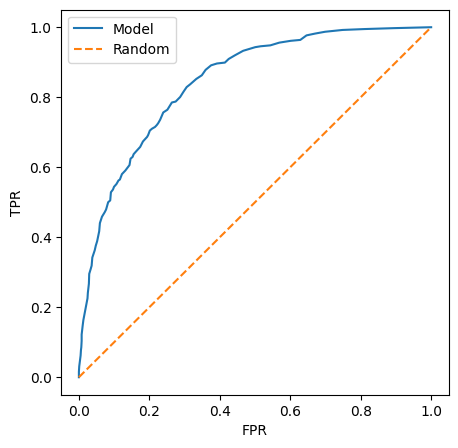

In [290]:
plt.figure(figsize=(5, 5))

plt.plot(df_scores.fpr, df_scores.tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

#ROC Curve. false positive, want it as close to 1.0 as possible. random is control.


In [ ]:
#tp is 0, fp is 0
#100% tp rate, incorrectly identified. 

In [293]:
from sklearn.metrics import roc_curve
#plotting with scikit.
# in metric package, roc_curve
# similar to previous but with a function
# finer grain, so more bumpy. evaluates on more thresholds.

In [294]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)

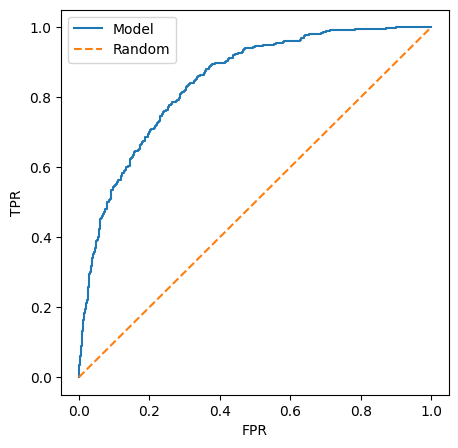

In [295]:
plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, label='Model')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--')

plt.xlabel('FPR')
plt.ylabel('TPR')

plt.legend()

## 4.6 ROC AUC

* Area under the ROC curve - useful metric for evaluating binary models
* Interpretation of AUC - AREA UNDER the roc CURVE - measuring it tells us how good our model is.


The Area under the ROC curves can tell us how good is our model with a single value. The AUROC of a random model is 0.5, while for an ideal one is 1.

In other words, AUC can be interpreted as the probability that a randomly selected positive example has a greater score than a randomly selected negative example.

Classes and methods:

    auc(x, y) - sklearn.metrics class for calculating area under the curve of the x and y datasets. For ROC curves x would be false positive rate, and y true positive rate.
    roc_auc_score(x, y) - sklearn.metrics class for calculating area under the ROC curves of the x false positive rate and y true positive rate datasets.
    randint(x, y, size=z) - np.random class for generating random integers from the “discrete uniform”; from x (inclusive) to y (exclusive) of size z.


In [296]:
from sklearn.metrics import auc
#area under curve <- for any curve. 

In [297]:
auc(fpr, tpr)
#false positive rate, true positive rate are our x,y for plotting curve


np.float64(0.8438884921418767)

In [298]:
auc(df_scores.fpr, df_scores.tpr)
#less accurate
#replace df_scores with df_ideal to find that 

np.float64(0.8436415804375021)

In [299]:
auc(df_ideal.fpr, df_ideal.tpr)

NameError: name 'df_ideal' is not defined

In [300]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
auc(fpr, tpr)

np.float64(0.8438884921418767)

In [301]:
from sklearn.metrics import roc_auc_score
#shortcut! 

In [302]:
roc_auc_score(y_val, y_pred)
#ROC AUC is 0.84 which is pretty good.
#^^^^ use this for ROC AUC

np.float64(0.8438884921418767)

In [303]:
#again, splitting set into positive and negative examples
neg = y_pred[y_val == 0]
pos = y_pred[y_val == 1]

In [304]:
import random

In [305]:
#randomly select both a positive and negative example
#repeats 100,000 times
# for each success, count

n = 100000
success = 0 

for i in range(n):
    pos_ind = random.randint(0, len(pos) - 1)
    neg_ind = random.randint(0, len(neg) - 1)

    if pos[pos_ind] > neg[neg_ind]:
        success = success + 1

success / n

#how well our model can order customers

0.84362

In [306]:
# same implementation but in a vectorized way with numpy.

n = 50000

np.random.seed(1)
pos_ind = np.random.randint(0, len(pos), size=n)
neg_ind = np.random.randint(0, len(neg), size=n)

#compare scores 
(pos[pos_ind] > neg[neg_ind]).mean()

np.float64(0.84662)

## 4.7 Cross-Validation

* Evaluating the same model on different subsets of data
* Getting the average prediction and the spread within predictions

In [ ]:
def train(df_train, y_train, C=1.0):
    dicts = df_train[categorical + numerical].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(C=C, max_iter=1000)
    model.fit(X_train, y_train)
    
    return dv, model

In [ ]:
dv, model = train(df_train, y_train, C=0.001)

In [ ]:
def predict(df, dv, model):
    dicts = df[categorical + numerical].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

In [ ]:
y_pred = predict(df_val, dv, model)

In [ ]:
from sklearn.model_selection import KFold

In [ ]:
!pip install tqdm

You should consider upgrading via the '/home/alexey/.pyenv/versions/3.8.11/bin/python3.8 -m pip install --upgrade pip' command.


In [ ]:
from tqdm.auto import tqdm

In [ ]:
n_splits = 5

for C in tqdm([0.001, 0.01, 0.1, 0.5, 1, 5, 10]):
    kfold = KFold(n_splits=n_splits, shuffle=True, random_state=1)

    scores = []

    for train_idx, val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.churn.values
        y_val = df_val.churn.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%s %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

  0%|          | 0/7 [00:00<?, ?it/s]

C=0.001 0.825 +- 0.009
C=0.01 0.840 +- 0.009
C=0.1 0.841 +- 0.008
C=0.5 0.840 +- 0.007
C=1 0.841 +- 0.008
C=5 0.841 +- 0.008
C=10 0.841 +- 0.008


In [ ]:
scores

[0.8419433083969826,
 0.8458047775129122,
 0.8325145494681918,
 0.8325466042079682,
 0.8525462018763139]

In [ ]:
dv, model = train(df_full_train, df_full_train.churn.values, C=1.0)
y_pred = predict(df_test, dv, model)

auc = roc_auc_score(y_test, y_pred)
auc

0.8572386167896259

## 4.8 Summary

* Metric - a single number that describes the performance of a model
* Accuracy - fraction of correct answers; sometimes misleading 
* Precision and recall are less misleading when we have class inbalance
* ROC Curve - a way to evaluate the performance at all thresholds; okay to use with imbalance
* K-Fold CV - more reliable estimate for performance (mean + std)

## 4.9 Explore more

* Check the precision and recall of the dummy classifier that always predict "FALSE"
* F1 score = 2 * P * R / (P + R)
* Evaluate precision and recall at different thresholds, plot P vs R - this way you'll get the precision/recall curve (similar to ROC curve)
* Area under the PR curve is also a useful metric

Other projects:

* Calculate the metrics for datasets from the previous week